In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

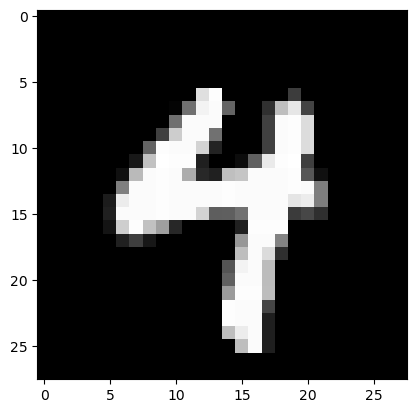

4


In [3]:
plt.imshow(X_train[3548], cmap='gray')
plt.show()
print(y_train[3548])

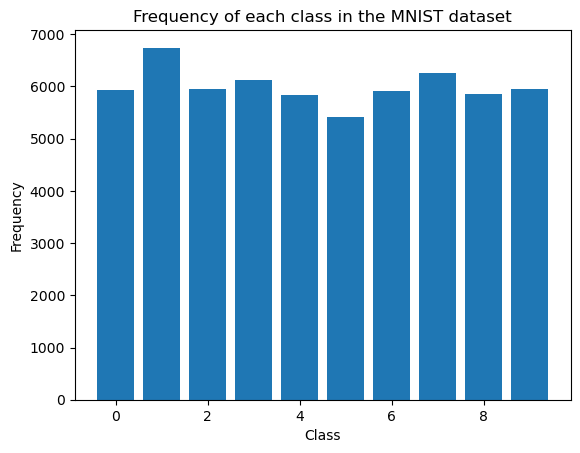

In [4]:
class_freq = np.bincount(y_train)
plt.bar(range(10), class_freq)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of each class in the MNIST dataset')
plt.show()

In [5]:
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255
x_test /= 255
x_train_flatten = x_train.reshape(X_train.shape[0], -1)
x_test_flatten = x_test.reshape(X_test.shape[0], -1)

In [6]:
svm_model = svm.SVC(kernel='rbf', C=2.8, gamma=0.0073)
svm_model.fit(x_train_flatten, y_train)

SVC(C=2.8, gamma=0.0073)

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_model.fit(x_train_flatten, y_train)

RandomForestClassifier(max_depth=10)

In [8]:
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train_cnn = X_train.astype('float32')
X_test_cnn = X_test.astype('float32')
X_train_cnn /= 255
X_test_cnn /= 255
y_train_cnn = np_utils.to_categorical(y_train, 10)
y_test_cnn = np_utils.to_categorical(y_test, 10)

In [9]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_cnn, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 45s 95ms/step - loss: 0.2421 - accuracy: 0.9262
Epoch 2/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0875 - accuracy: 0.9746
Epoch 3/10
469/469 [==============================] - 46s 98ms/step - loss: 0.0653 - accuracy: 0.9803
Epoch 4/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 5/10
469/469 [==============================] - 45s 96ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 6/10
469/469 [==============================] - 52s 112ms/step - loss: 0.0396 - accuracy: 0.9876
Epoch 7/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0342 - accuracy: 0.9888
Epoch 8/10
469/469 [==============================] - 48s 101ms/step - loss: 0.0317 - accuracy: 0.9900
Epoch 9/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0296 - accuracy: 0.9908
Epoch 10/10
469/469 [==============================] - 50s 106ms/step - loss:

In [10]:
svm_train_preds = svm_model.predict(x_train_flatten)
svm_test_preds = svm_model.predict(x_test_flatten)
cnn_train_preds = cnn_model.predict(X_train_cnn)
cnn_test_preds = cnn_model.predict(X_test_cnn)
rf_train_preds = rf_model.predict(x_train_flatten)
rf_test_preds = rf_model.predict(x_test_flatten)

313/313 [==============================] - 2s 7ms/step


In [11]:
svm_train_preds = svm_train_preds[:, np.newaxis]
svm_test_preds = svm_test_preds[:, np.newaxis]
rf_train_preds = rf_train_preds[:, np.newaxis]
rf_test_preds = rf_test_preds[:, np.newaxis]

In [12]:
ensemble_train_features = np.concatenate((svm_train_preds, cnn_train_preds, rf_train_preds), axis=1)
ensemble_test_features = np.concatenate((svm_test_preds, cnn_test_preds, rf_test_preds), axis=1)

In [13]:
ensemble_model = RandomForestClassifier(n_estimators=100, max_depth=10)
ensemble_model.fit(ensemble_train_features, y_train)

RandomForestClassifier(max_depth=10)

In [14]:
print

<function print>

In [15]:
ensemble_train_acc = ensemble_model.score(ensemble_train_features, y_train)
ensemble_test_acc = ensemble_model.score(ensemble_test_features, y_test)
print('Ensemble training accuracy:', ensemble_train_acc)
print('Ensemble testing accuracy:', ensemble_test_acc)

Ensemble training accuracy: 0.9995333333333334
Ensemble testing accuracy: 0.9927


In [16]:
import cv2
import numpy as np

def convert_to_mnist_format(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    img_resized = cv2.resize(img_gray, (28, 28))

    # Invert the image
    img_inverted = cv2.bitwise_not(img_resized)

    # Normalize the pixel values to be between 0 and 1
    img_normalized = img_inverted / 255.0

    # Flatten the image and convert to a 1D array
    img_flattened = img_normalized.reshape(1, 28*28)

    # Save the image in MNIST format
    np.savetxt('mnist_image.txt', img_flattened, delimiter=' ', fmt='%1.3f')


In [17]:


def remove_background(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Find the contours of the objects in the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask with the same dimensions as the original image
    mask = np.zeros(img.shape[:2], np.uint8)

    # Draw the contours of the objects on the mask
    for contour in contours:
        cv2.drawContours(mask, [contour], 0, (255,255,255), -1)

    # Apply the mask to the original image
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    # Save the masked image
    cv2.imwrite('masked_image.jpg', masked_img)


In [18]:
def pred_ensmbl(mnist_image):
    mnist_image = mnist_image.reshape(1, -1)
    #mnist_image = (mnist_image>0.3).astype(int)
    svm_pred = svm_model.predict(mnist_image)
    cnn_pred = cnn_model.predict(mnist_image.reshape(1,28,28,1))
    rf_pred = rf_model.predict(mnist_image)
    svm_pred = svm_pred[:, np.newaxis]
    rf_pred = rf_pred[:, np.newaxis]
    ensemble_train_feature = np.concatenate((svm_pred, cnn_pred, rf_pred), axis=1)
    predictions = ensemble_model.predict(ensemble_train_feature)
    print('Predicted class:', (predictions))
    return predictions[0]
#     return np.argmax(predictions)


In [19]:
remove_background("img.jpg")
convert_to_mnist_format("img.jpg")

In [20]:
convert_to_mnist_format("img.jpg")

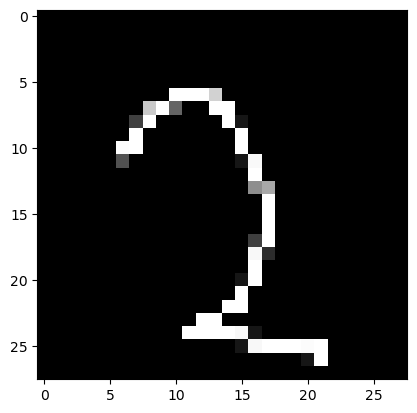

1/1 [==============================] - 0s 72ms/step
Predicted class: [2]
2


In [21]:
mnist_image = np.loadtxt('mnist_image.txt')
#img = (mnist_image>0.1).astype(int)
img=mnist_image.reshape(1,28,28)
plt.imshow(img[0], cmap='gray')
plt.show()
print(pred_ensmbl(mnist_image))

In [22]:
mnist_image = np.loadtxt('mnist_image.txt')

# Reshape the image to match the input shape of the model


# Make predictions on the image using the loaded model
predictions = ensemble_model.predict(mnist_image)

# Print the predicted class
print('Predicted class:', np.argmax(predictions))

ValueError: Expected 2D array, got 1D array instead:
array=[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.
 1.    0.824 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.788 1.    0.392 0.    0.    1.    1.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.251 1.    0.    0.    0.    0.    0.    1.    0.086
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
 0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.992 1.
 0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.318 0.    0.    0.    0.    0.    0.    0.    0.    0.086
 0.976 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.557 0.659 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.247 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.969 0.173 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.086
 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    1.    1.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.
 1.    1.    1.    0.969 0.086 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.086 0.969 1.    1.    1.
 0.988 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.086 1.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
svm_train_accuracy = accuracy_score(y_train, svm_train_preds)
svm_train_precision = precision_score(y_train, svm_train_preds, average='weighted')
svm_train_recall = recall_score(y_train, svm_train_preds, average='weighted')
svm_train_f1 = f1_score(y_train, svm_train_preds, average='weighted')

print("Accuracy:", svm_train_accuracy)
print("Precision:", svm_train_precision)
print("Recall:", svm_train_recall)
print("F1 score:", svm_train_f1)

Accuracy: 0.9907333333333334
Precision: 0.9907361643539926
Recall: 0.9907333333333334
F1 score: 0.9907313370994139


In [25]:
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)
svm_test_precision = precision_score(y_test, svm_test_preds, average='weighted')
svm_test_recall = recall_score(y_test, svm_test_preds, average='weighted')
svm_test_f1 = f1_score(y_test, svm_test_preds, average='weighted')

print("Accuracy:", svm_test_accuracy)
print("Precision:", svm_test_precision)
print("Recall:", svm_test_recall)
print("F1 score:", svm_test_f1)

Accuracy: 0.9797
Precision: 0.9797038357081715
Recall: 0.9797
F1 score: 0.9796868593965843


In [26]:
# ensb_tes_accuracy = accuracy_score(y_test, ensemble_test_features)
# ensb_tes_precision = precision_score(y_test, y_pred, average='weighted')
# ensb_tes_recall = recall_score(y_test, y_pred, average='weighted')
# ensb_tes_f1 = f1_score(y_test, y_pred, average='weighted')

# print("Accuracy:", ensb_tes_accuracy)
# print("Precision:", ensb_tes_precision)
# print("Recall:", ensb_tes_recall)
# print("F1 score:", ensb_tes_f1)

In [27]:
rf_train_acc = rf_model.score(x_train_flatten, y_train)
rf_test_acc = rf_model.score(x_test_flatten, y_test)
print('Random Forest training accuracy:', rf_train_acc)
print('Random Forest testing accuracy:', rf_test_acc)

Random Forest training accuracy: 0.96375
Random Forest testing accuracy: 0.9473


In [28]:
cnn_train_acc = cnn_model.evaluate(X_train_cnn, y_train_cnn, verbose=0)[1]
cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)[1]
print('CNN training accuracy:', cnn_train_acc)
print('CNN testing accuracy:', cnn_test_acc)

CNN training accuracy: 0.9984999895095825
CNN testing accuracy: 0.9926000237464905


In [29]:
!pip install flask-ngrok
!pip install -U flask-cors

DEBUG:flask_cors.extension:Configuring CORS with resources: {'/*': {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}}


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS

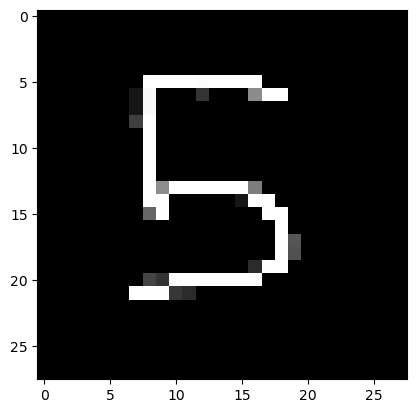

1/1 [==============================] - 0s 25ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:17:48] "POST /getImage HTTP/1.1" 200 -


Predicted class: [5]
Predicted class: 5


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:18:09] "OPTIONS /getImage HTTP/1.1" 200 -


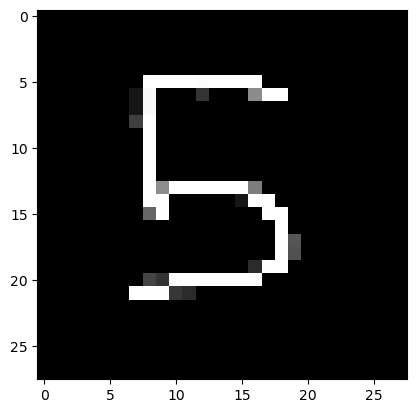

1/1 [==============================] - 0s 23ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:18:09] "POST /getImage HTTP/1.1" 200 -


Predicted class: [5]
Predicted class: 5


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:18:26] "OPTIONS /getImage HTTP/1.1" 200 -


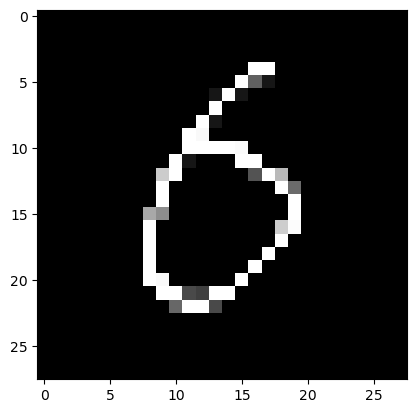

1/1 [==============================] - 0s 21ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:18:26] "POST /getImage HTTP/1.1" 200 -


Predicted class: [6]
Predicted class: 6


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:18:56] "OPTIONS /getImage HTTP/1.1" 200 -


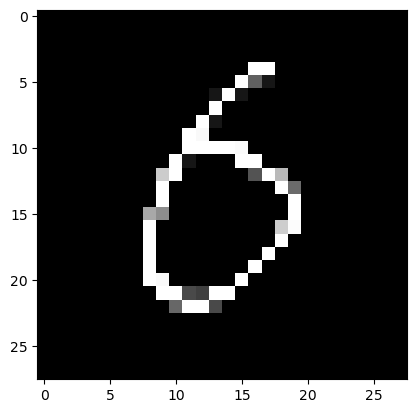

1/1 [==============================] - 0s 22ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:18:56] "POST /getImage HTTP/1.1" 200 -


Predicted class: [6]
Predicted class: 6


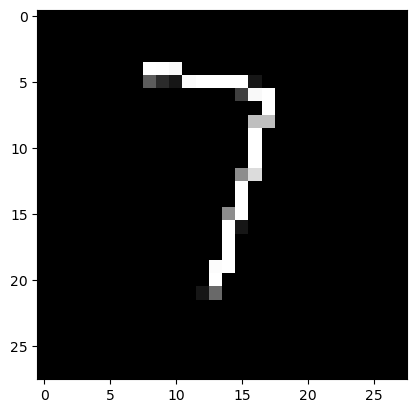

1/1 [==============================] - 0s 28ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:01] "POST /getImage HTTP/1.1" 200 -


Predicted class: [3]
Predicted class: 3


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:05] "OPTIONS /getImage HTTP/1.1" 200 -


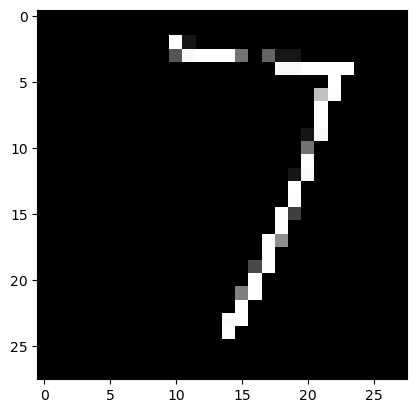

1/1 [==============================] - 0s 23ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:05] "POST /getImage HTTP/1.1" 200 -


Predicted class: [2]
Predicted class: 2


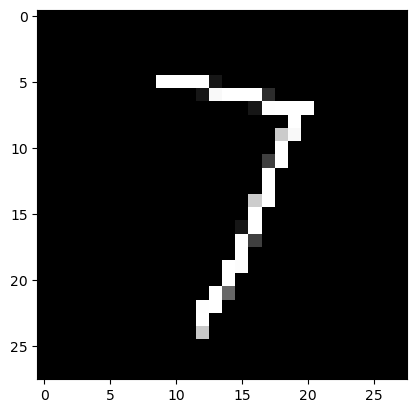

1/1 [==============================] - 0s 22ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:08] "POST /getImage HTTP/1.1" 200 -


Predicted class: [7]
Predicted class: 7


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:12] "OPTIONS /getImage HTTP/1.1" 200 -


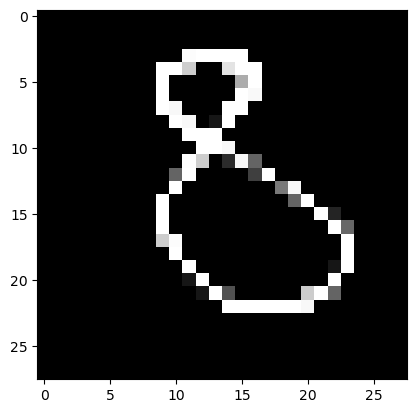

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:12] "POST /getImage HTTP/1.1" 200 -


Predicted class: [6]
Predicted class: 6


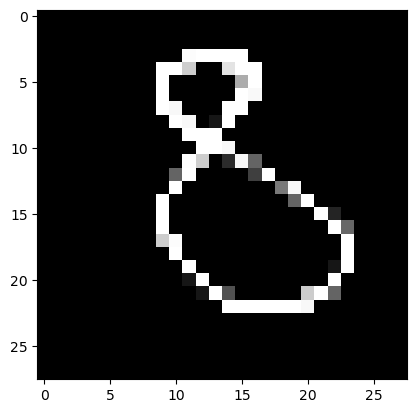

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:13] "POST /getImage HTTP/1.1" 200 -


Predicted class: [6]
Predicted class: 6


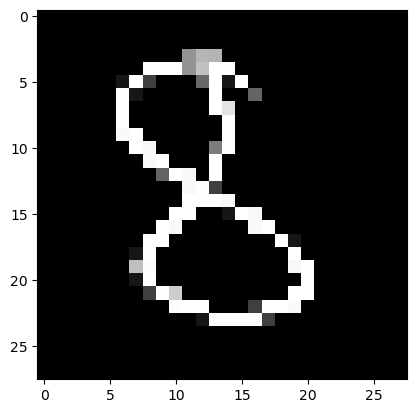

1/1 [==============================] - 0s 18ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:17] "POST /getImage HTTP/1.1" 200 -


Predicted class: [8]
Predicted class: 8


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:20] "OPTIONS /getImage HTTP/1.1" 200 -


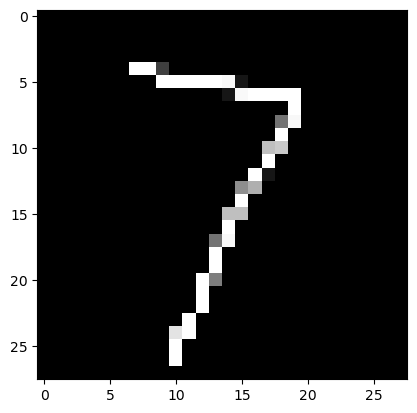

1/1 [==============================] - 0s 24ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:20] "POST /getImage HTTP/1.1" 200 -


Predicted class: [7]
Predicted class: 7


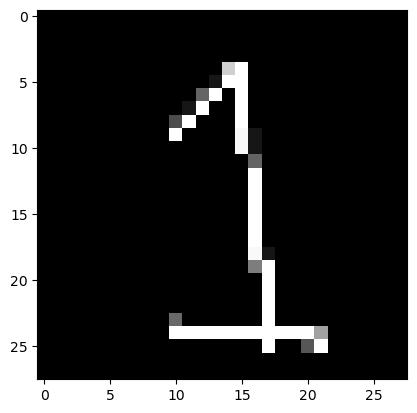

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:24] "POST /getImage HTTP/1.1" 200 -


Predicted class: [3]
Predicted class: 3


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:25] "OPTIONS /getImage HTTP/1.1" 200 -


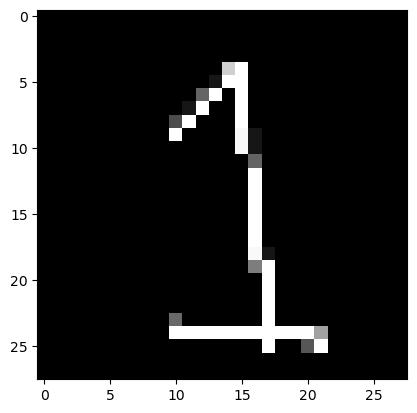

1/1 [==============================] - 0s 22ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:25] "POST /getImage HTTP/1.1" 200 -


Predicted class: [3]
Predicted class: 3


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:36] "OPTIONS /getImage HTTP/1.1" 200 -


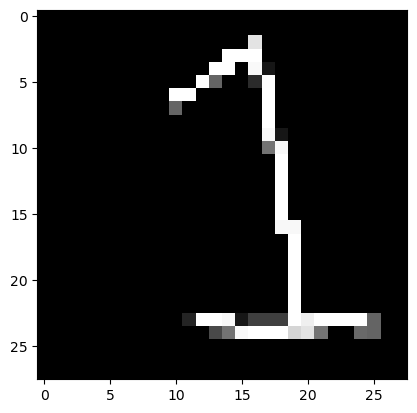

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:36] "POST /getImage HTTP/1.1" 200 -


Predicted class: [2]
Predicted class: 2


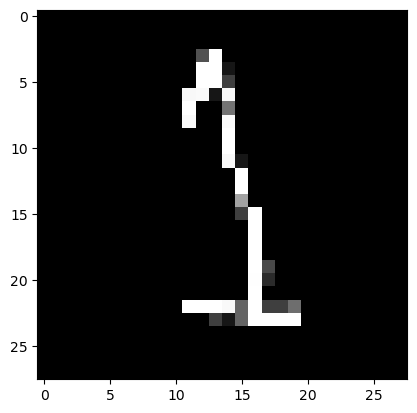

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:40] "POST /getImage HTTP/1.1" 200 -


Predicted class: [1]
Predicted class: 1


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:44] "OPTIONS /getImage HTTP/1.1" 200 -


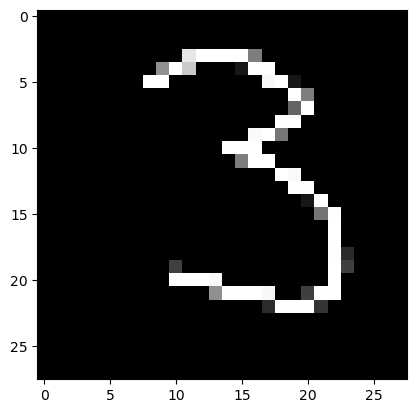

1/1 [==============================] - 0s 23ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:44] "POST /getImage HTTP/1.1" 200 -


Predicted class: [3]
Predicted class: 3


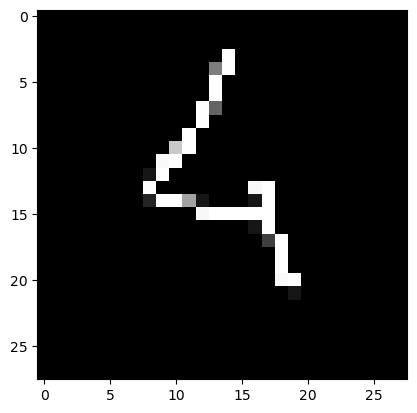

1/1 [==============================] - 0s 21ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:48] "POST /getImage HTTP/1.1" 200 -


Predicted class: [4]
Predicted class: 4


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:50] "OPTIONS /getImage HTTP/1.1" 200 -


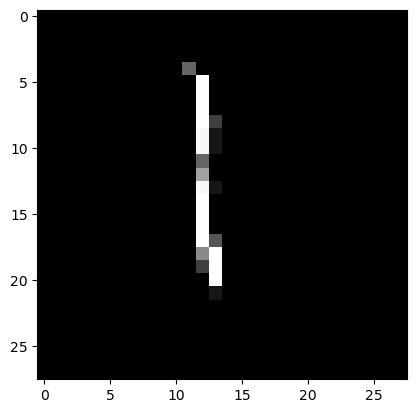

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:50] "POST /getImage HTTP/1.1" 200 -


Predicted class: [4]
Predicted class: 4


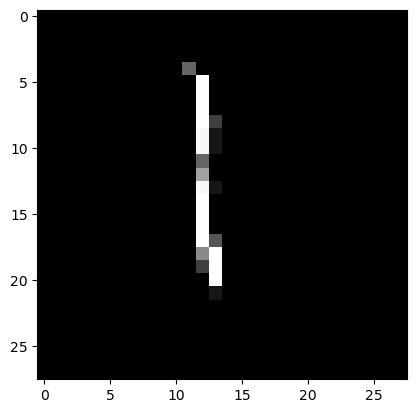

1/1 [==============================] - 0s 21ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:51] "POST /getImage HTTP/1.1" 200 -


Predicted class: [4]
Predicted class: 4


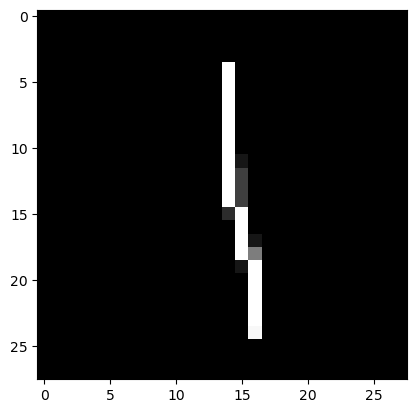

1/1 [==============================] - 0s 21ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:54] "POST /getImage HTTP/1.1" 200 -


Predicted class: [1]
Predicted class: 1


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:58] "OPTIONS /getImage HTTP/1.1" 200 -


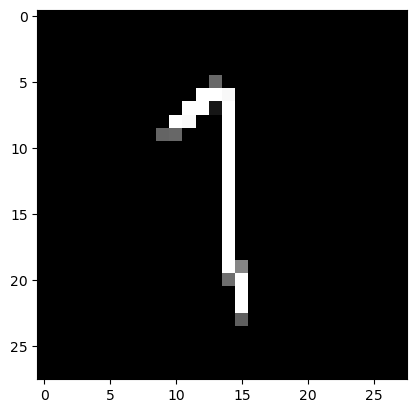

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:19:58] "POST /getImage HTTP/1.1" 200 -


Predicted class: [1]
Predicted class: 1


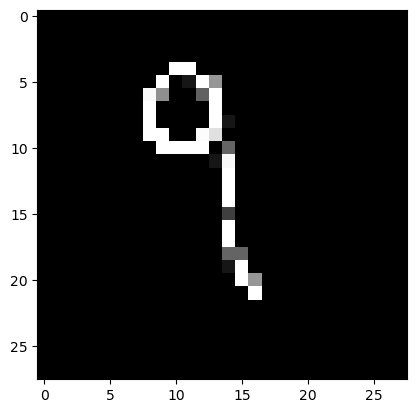

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:02] "POST /getImage HTTP/1.1" 200 -


Predicted class: [1]
Predicted class: 1


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:25] "OPTIONS /getImage HTTP/1.1" 200 -


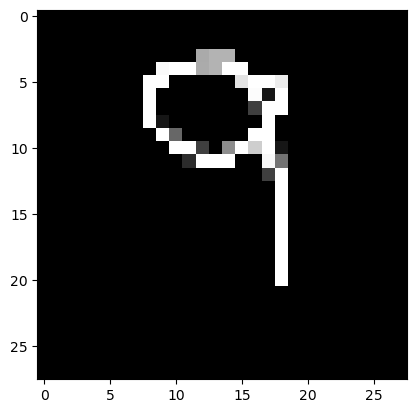

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:26] "POST /getImage HTTP/1.1" 200 -


Predicted class: [8]
Predicted class: 8


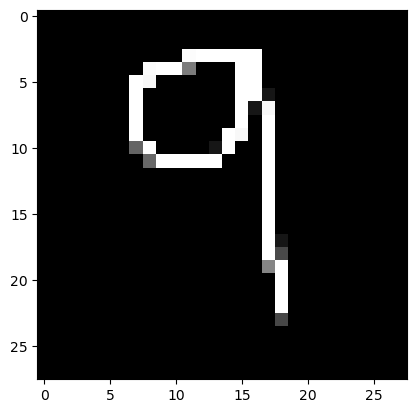

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:30] "POST /getImage HTTP/1.1" 200 -


Predicted class: [7]
Predicted class: 7


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:33] "OPTIONS /getImage HTTP/1.1" 200 -


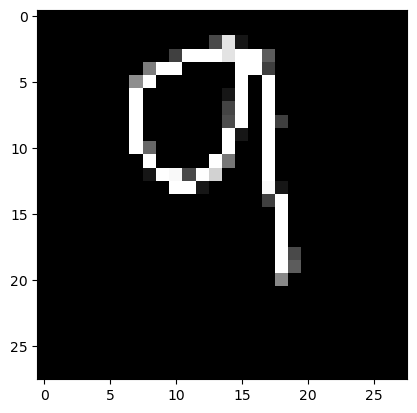

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:34] "POST /getImage HTTP/1.1" 200 -


Predicted class: [4]
Predicted class: 4


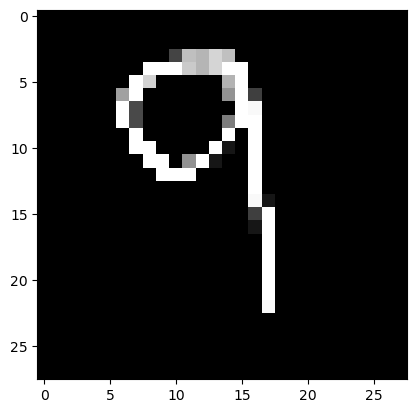

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:38] "POST /getImage HTTP/1.1" 200 -


Predicted class: [4]
Predicted class: 4


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:41] "OPTIONS /getImage HTTP/1.1" 200 -


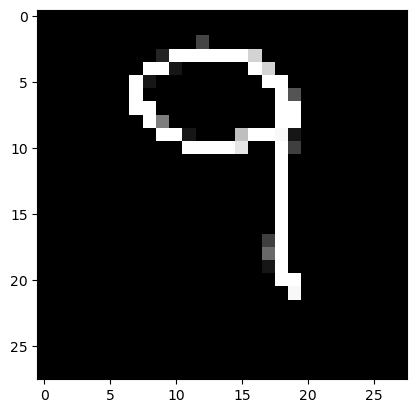

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:41] "POST /getImage HTTP/1.1" 200 -


Predicted class: [2]
Predicted class: 2


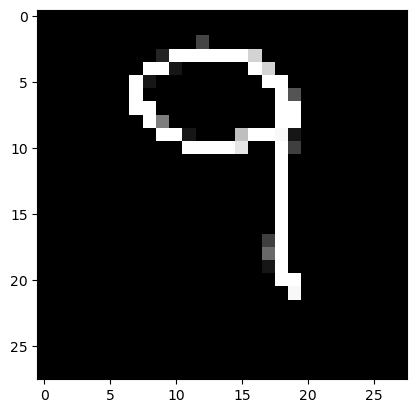

1/1 [==============================] - 0s 23ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:42] "POST /getImage HTTP/1.1" 200 -


Predicted class: [2]
Predicted class: 2


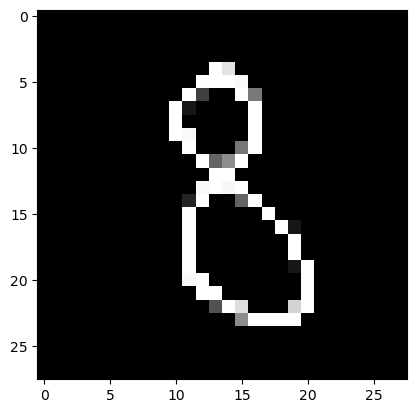

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:46] "POST /getImage HTTP/1.1" 200 -


Predicted class: [8]
Predicted class: 8


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:50] "OPTIONS /getImage HTTP/1.1" 200 -


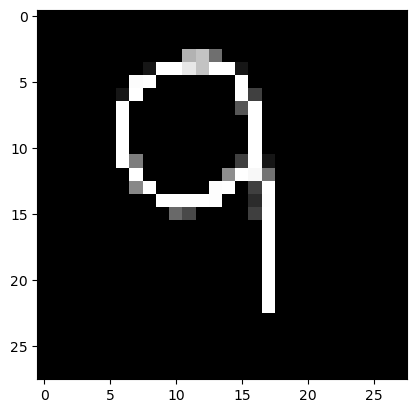

1/1 [==============================] - 0s 24ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:50] "POST /getImage HTTP/1.1" 200 -


Predicted class: [9]
Predicted class: 9


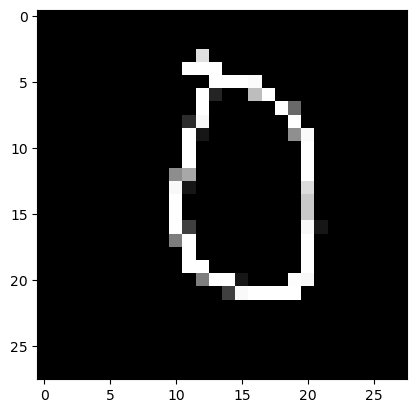

1/1 [==============================] - 0s 21ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:54] "POST /getImage HTTP/1.1" 200 -


Predicted class: [0]
Predicted class: 0


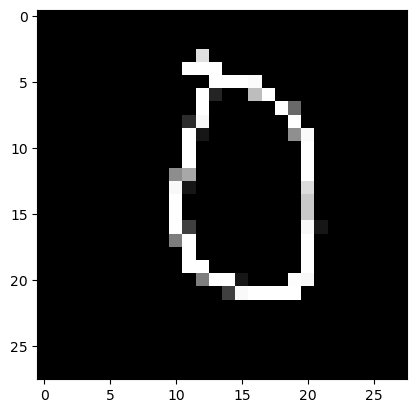

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:20:55] "POST /getImage HTTP/1.1" 200 -


Predicted class: [0]
Predicted class: 0


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:21:35] "OPTIONS /getImage HTTP/1.1" 200 -


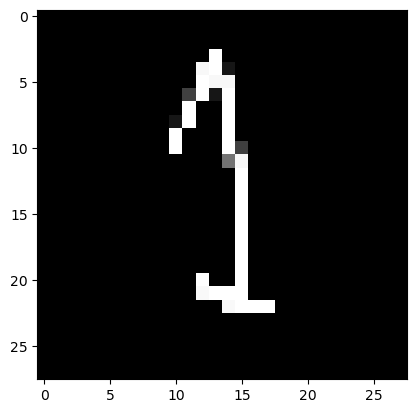

1/1 [==============================] - 0s 24ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:21:35] "POST /getImage HTTP/1.1" 200 -


Predicted class: [1]
Predicted class: 1


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:21:42] "OPTIONS /getImage HTTP/1.1" 200 -


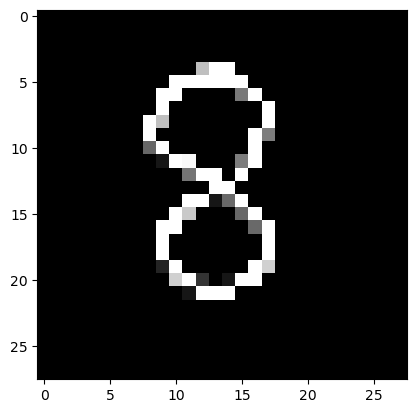

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:21:42] "POST /getImage HTTP/1.1" 200 -


Predicted class: [8]
Predicted class: 8


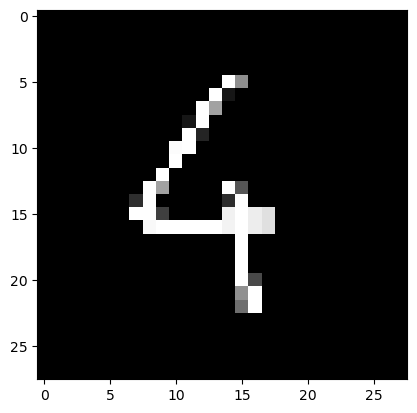

1/1 [==============================] - 0s 22ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:21:46] "POST /getImage HTTP/1.1" 200 -


Predicted class: [4]
Predicted class: 4


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:21:50] "OPTIONS /getImage HTTP/1.1" 200 -


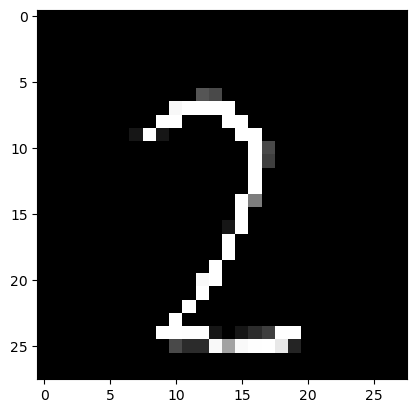

1/1 [==============================] - 0s 22ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:21:50] "POST /getImage HTTP/1.1" 200 -


Predicted class: [2]
Predicted class: 2


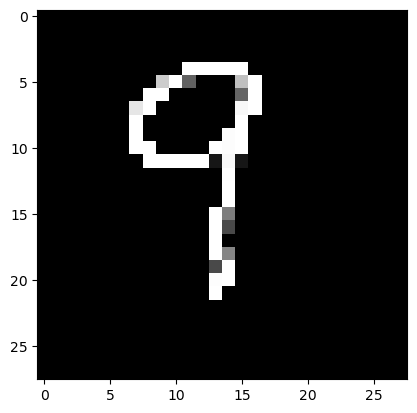

1/1 [==============================] - 0s 21ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:21:54] "POST /getImage HTTP/1.1" 200 -


Predicted class: [8]
Predicted class: 8


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:21:57] "OPTIONS /getImage HTTP/1.1" 200 -


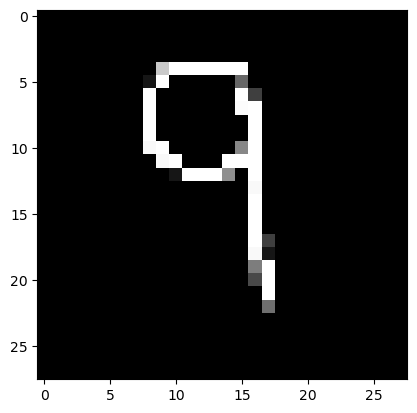

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:21:58] "POST /getImage HTTP/1.1" 200 -


Predicted class: [9]
Predicted class: 9


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:03] "OPTIONS /getImage HTTP/1.1" 200 -


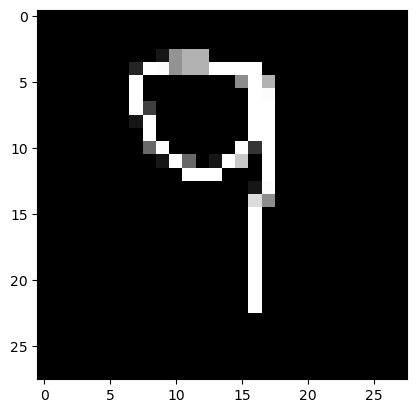

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:04] "POST /getImage HTTP/1.1" 200 -


Predicted class: [7]
Predicted class: 7


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:20] "OPTIONS /getImage HTTP/1.1" 200 -


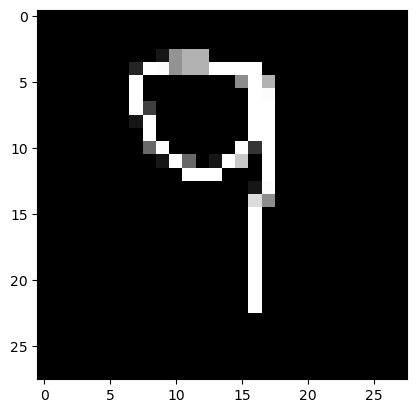

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:20] "POST /getImage HTTP/1.1" 200 -


Predicted class: [7]
Predicted class: 7


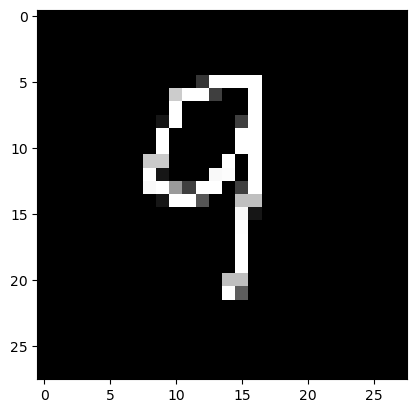

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:23] "POST /getImage HTTP/1.1" 200 -


Predicted class: [9]
Predicted class: 9


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:32] "OPTIONS /getImage HTTP/1.1" 200 -


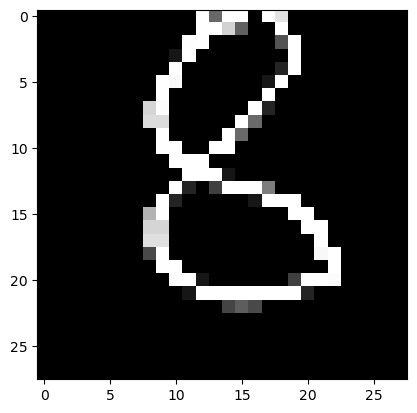

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:33] "POST /getImage HTTP/1.1" 200 -


Predicted class: [6]
Predicted class: 6


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:40] "OPTIONS /getImage HTTP/1.1" 200 -


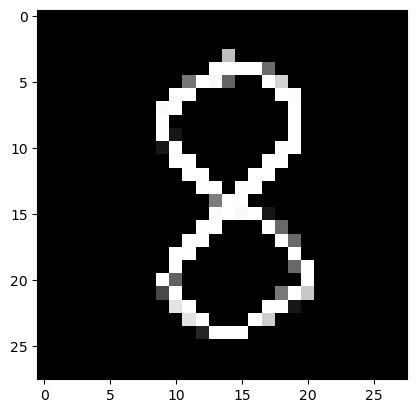

1/1 [==============================] - 0s 21ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:41] "POST /getImage HTTP/1.1" 200 -


Predicted class: [8]
Predicted class: 8


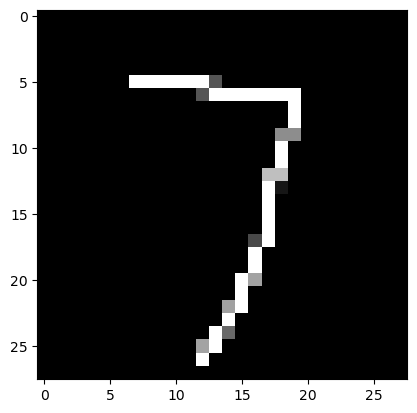

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:45] "POST /getImage HTTP/1.1" 200 -


Predicted class: [7]
Predicted class: 7


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:49] "OPTIONS /getImage HTTP/1.1" 200 -


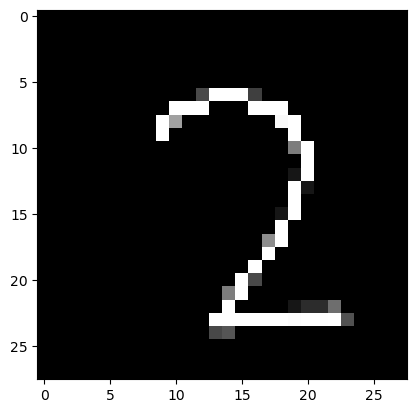

1/1 [==============================] - 0s 23ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:49] "POST /getImage HTTP/1.1" 200 -


Predicted class: [2]
Predicted class: 2


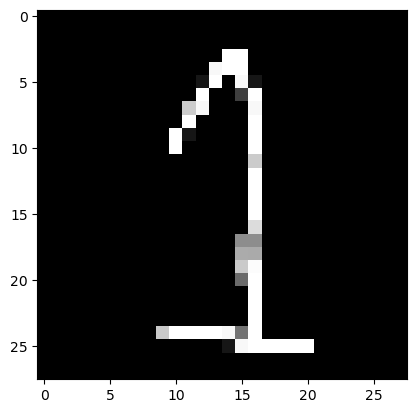

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:53] "POST /getImage HTTP/1.1" 200 -


Predicted class: [2]
Predicted class: 2


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:57] "OPTIONS /getImage HTTP/1.1" 200 -


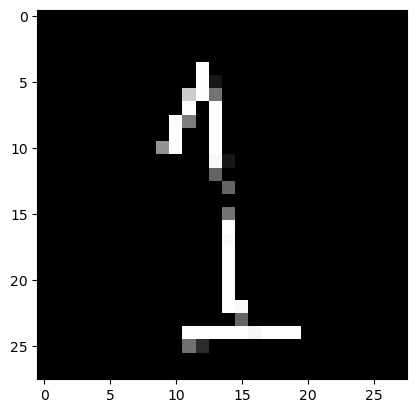

1/1 [==============================] - 0s 24ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:22:57] "POST /getImage HTTP/1.1" 200 -


Predicted class: [1]
Predicted class: 1


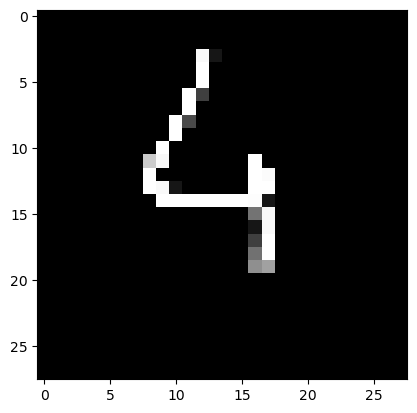

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:23:02] "POST /getImage HTTP/1.1" 200 -


Predicted class: [4]
Predicted class: 4


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:23:06] "OPTIONS /getImage HTTP/1.1" 200 -


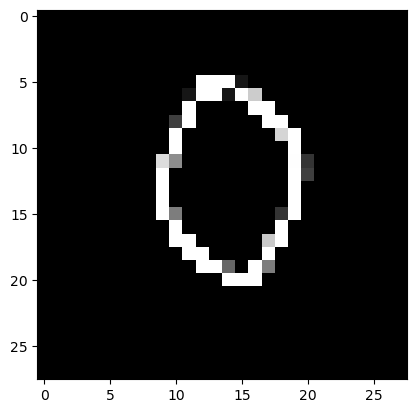

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:23:06] "POST /getImage HTTP/1.1" 200 -


Predicted class: [0]
Predicted class: 0


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:23:49] "OPTIONS /getImage HTTP/1.1" 200 -


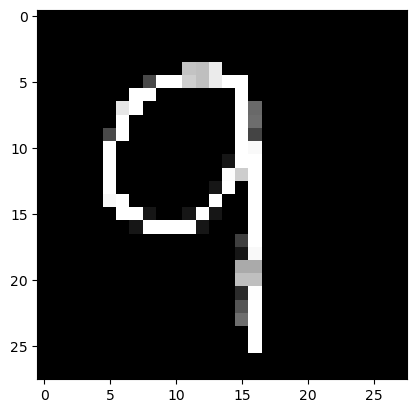

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:23:49] "POST /getImage HTTP/1.1" 200 -


Predicted class: [9]
Predicted class: 9


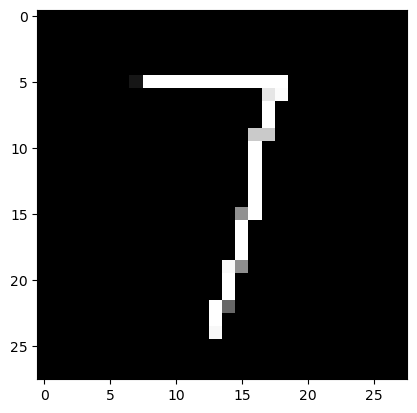

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:23:54] "POST /getImage HTTP/1.1" 200 -


Predicted class: [7]
Predicted class: 7


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:23:59] "OPTIONS /getImage HTTP/1.1" 200 -


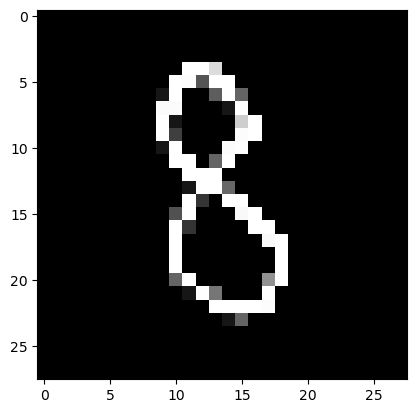

1/1 [==============================] - 0s 20ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:23:59] "POST /getImage HTTP/1.1" 200 -


Predicted class: [8]
Predicted class: 8


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Access-Control-Allow-Headers', 'content-type'), ('Access-Control-Allow-Methods', 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:24:07] "OPTIONS /getImage HTTP/1.1" 200 -


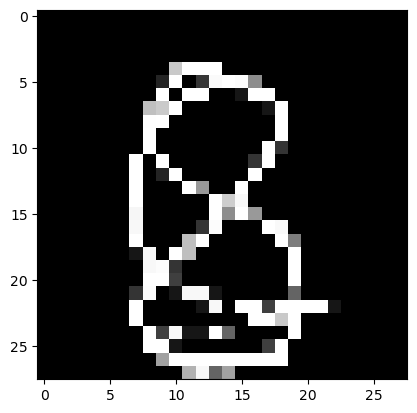

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:24:07] "POST /getImage HTTP/1.1" 200 -


Predicted class: [8]
Predicted class: 8


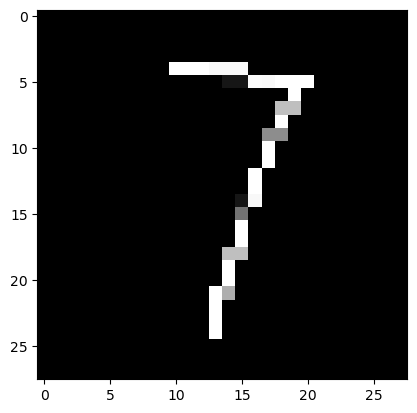

1/1 [==============================] - 0s 19ms/step


DEBUG:flask_cors.extension:Request to '/getImage' matches CORS resource '/*'. Using options: {'origins': ['.*'], 'methods': 'DELETE, GET, HEAD, OPTIONS, PATCH, POST, PUT', 'allow_headers': ['.*'], 'expose_headers': None, 'supports_credentials': False, 'max_age': None, 'send_wildcard': False, 'automatic_options': True, 'vary_header': True, 'resources': '/*', 'intercept_exceptions': True, 'always_send': True}
DEBUG:flask_cors.core:CORS request received with 'Origin' http://localhost:3000
DEBUG:flask_cors.core:The request's Origin header matches. Sending CORS headers.
DEBUG:flask_cors.core:Settings CORS headers: MultiDict([('Access-Control-Allow-Origin', 'http://localhost:3000'), ('Vary', 'Origin')])
INFO:werkzeug:127.0.0.1 - - [19/Apr/2023 14:24:10] "POST /getImage HTTP/1.1" 200 -


Predicted class: [7]
Predicted class: 7


In [ ]:
import logging
from flask import Flask, request, make_response, jsonify
from flask_cors import CORS, cross_origin
from flask_ngrok import run_with_ngrok

import base64
app = Flask(__name__)
logging.basicConfig(level=logging.INFO)
logging.getLogger('flask_cors').level = logging.DEBUG
CORS(app)
# app.config['CORS_HEADERS'] = 'Content-Type' 
# run_with_ngrok(app)  

# def _build_cors_preflight_response():
#     response = make_response()
#     response.headers.add("Access-Control-Allow-Origin", "http://localhost:3000/")
#     response.headers.add('Access-Control-Allow-Headers', "Content-Type")
#     response.headers.add('Access-Control-Allow-Methods', "OPTIONS, POST")
#     return response

# def _corsify_actual_response(response):
#     response.headers.add("Access-Control-Allow-Origin", "*")
#     return response
  
@app.route("/")
def homeRoute():
    return "<h1>Hello World!</h1>"

@app.route("/getImage", methods=['POST'])
def getImageRoute():
    # if request.method == "OPTIONS": # CORS preflight
    #     return _build_cors_preflight_response()
#     if request.method == "POST":
#     print(request.json['image'])
    img_file = open('img.jpg', 'wb')
    img_file.write(base64.b64decode((request.json['image'][22:])))
    img_file.close()
    remove_background("img.jpg")
    convert_to_mnist_format("img.jpg")
    mnist_image = np.loadtxt('mnist_image.txt')
    #img = (mnist_image>0.1).astype(int)
    img = mnist_image.reshape(1,28,28)
    plt.imshow(img[0], cmap='gray')
    plt.show()
    prediction = pred_ensmbl(mnist_image)
#     predictions = ensemble_model.predict(mnist_image)
#     Print the predicted class
#     prediction = np.argmax(predictions)
    print('Predicted class:', prediction)
    return jsonify(prediction=int(prediction))
#         return _corsify_actual_response(jsonify({"field": "nice"}))
#     return _build_cors_preflight_response()
    
app.run()